In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer


In [3]:
d_m=pd.read_csv('group5.csv')
dc=d_m.rename(columns={'Demographics Question':'demographics_question'})
dc

,RecordID,Country,Gender,demographics_question,Demographics_Response,Question,Survey_Year,Value
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,01/01/2015,NaN
1,1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7
3,1,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,01/01/2015,13.8
...,...,...,...,...,...,...,...,...
12595,210,Zimbabwe,M,Residence,Urban,... if she goes out without telling him,01/01/2015,11.8
12596,280,Zimbabwe,M,Residence,Rural,... if she neglects the children,01/01/2015,20.1
12597,280,Zimbabwe,M,Residence,Urban,... if she neglects the children,01/01/2015,15.0
12598,350,Zimbabwe,M,Residence,Rural,... if she refuses to have sex with him,01/01/2015,7.2


In [4]:
da=dc.dropna()
da.to_excel("processed_datafile.xlsx", index=False)
da.describe(include='all')
da.describe()


,RecordID,Value
count,11187.00000,11187.000000
mean,211.13328,19.762537
std,120.86662,16.986437
min,1.00000,0.000000
25%,106.00000,6.200000
50%,212.00000,14.900000
75%,316.00000,29.200000
max,420.00000,86.900000


In [ ]:
da.dtypes

#  Gender  based question

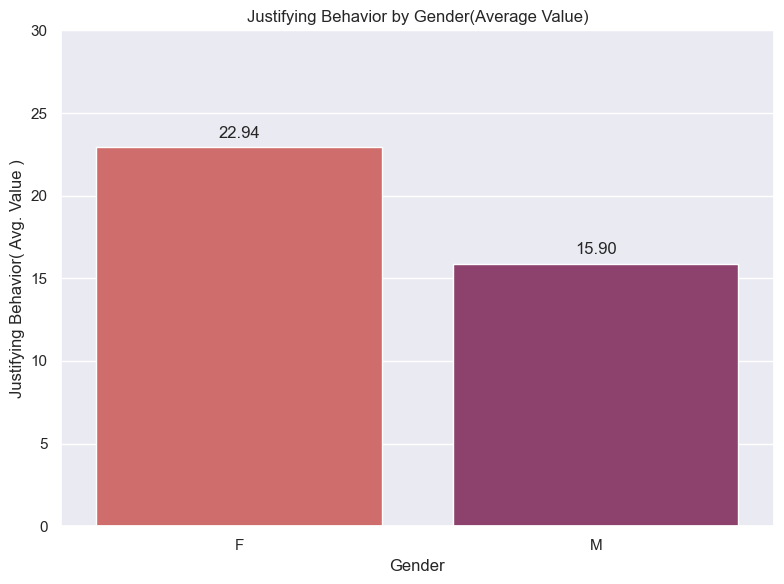

In [6]:

# Filter out demographic questions
filtered_demographic_questions = da[da['demographics_question'] != 'demographics']

# Sum the values of all questions for each gender
mean_data = filtered_demographic_questions.groupby(['Gender'])['Value'].mean().reset_index()

#plot
sns.set_theme( style='darkgrid', palette='deep')
plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")
ax=sns.barplot(data=mean_data, x='Gender', y='Value', palette="flare", orient="v", estimator='mean', errorbar=('ci', 95))
plt.ylim(0, 30)
plt.title('Justifying Behavior by Gender(Average Value)')
plt.xlabel('Gender')
plt.ylabel('Justifying Behavior( Avg. Value )')

plt.tight_layout()

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.savefig(f'Justify Behavioiur.png', dpi=150)
plt.show()


<Figure size 1200x800 with 0 Axes>

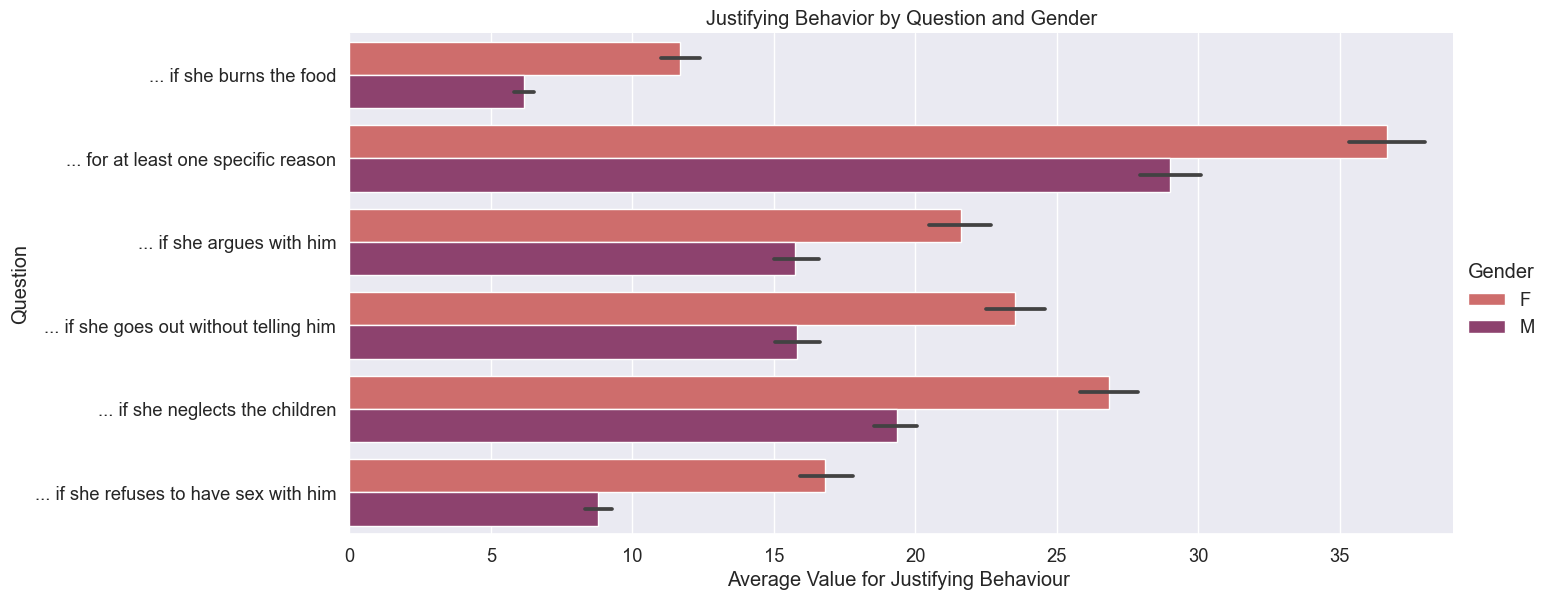

In [7]:
# plot to visualize justifying behavior based on the 'Question' column and 'Gender'
plt.figure(figsize=(12, 8))
# Customizing the color palette for better visualization
sns.set_theme( style='darkgrid', palette='deep',font='sans-serif',
    font_scale=1.2)

# Creating the bar plot
ax = sns.catplot(data=da, x='Value', y='Question', hue='Gender', kind='bar', palette="flare", height=6, aspect=2.5)
ax.set(xlabel="Mean Value for Justifying Behavior", ylabel="Question")
plt.title("Justifying Behavior by Question and Gender")
plt.xlim(0, 39)
plt.savefig(f'Justify gender Behaviour.png', dpi=170)
plt.xlabel('Average Value for Justifying Behaviour ')
plt.ylabel('Question')
plt.show()


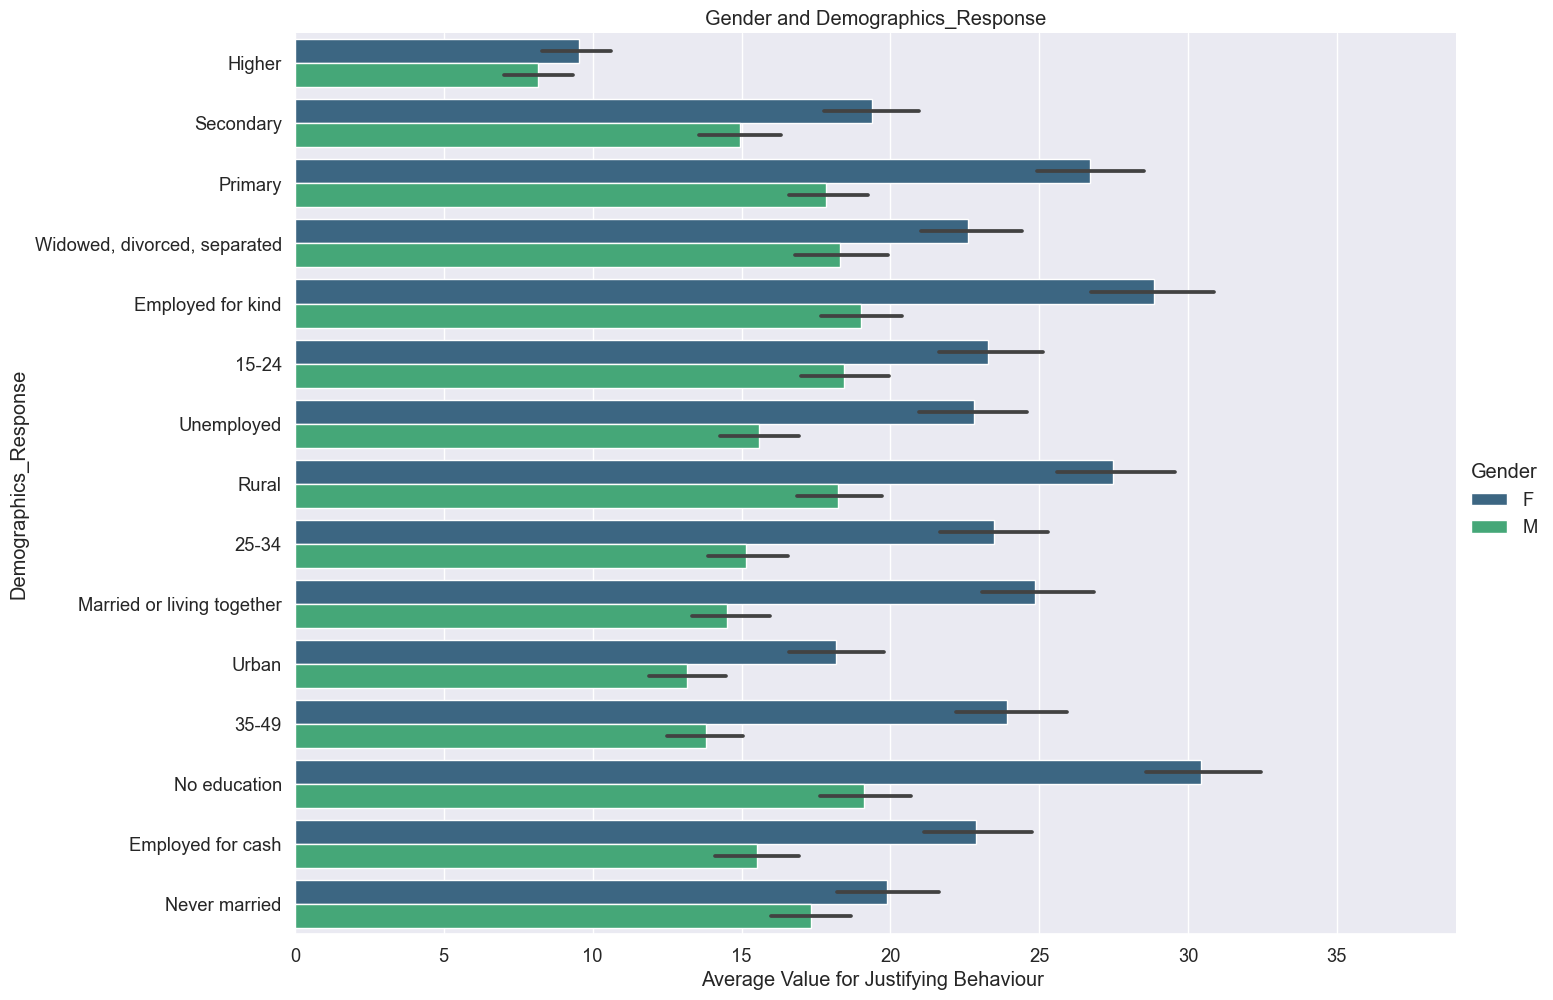

In [9]:

sns.set_theme( style='darkgrid', palette='deep',font='sans-serif',
    font_scale=1.2)

# Create cat plot
ax = sns.catplot(data=da, x='Value', y='Demographics_Response', hue='Gender', kind='bar', palette="viridis", height=10, aspect=1.5)
ax.set(xlabel="Mean Value for Justifying Behavior", ylabel="Question")
plt.title("Gender and Demographics_Response")
plt.xlim(0, 39)
plt.xlabel('Average Value for Justifying Behaviour ')
plt.ylabel('Demographics_Response')
plt.savefig(f'Justify behaiour.png', dpi=170)
plt.show()

In [ ]:
da

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = da

# Extract education levels from 'Demographics_Response' column
data['Education_Level'] = data['Demographics_Response'].str.extract(r'(Higher|Secondary|Primary|No education)')
data['Residence'] = data['Demographics_Response'].str.extract(r'(Urban|Rural)')

# Filter rows where education level is not null and the question relates to violence against women
education_attitudes = data[data['Education_Level'].notnull()]
Residence_attitudes = data[data['Residence'].notnull()]




In [ ]:
data

In [ ]:
#data=da
#data['Education_Level']=data['Demographics_Response'].str.extract(r'(Higher|Secondary|Primary|No Education) ')
#data['Residence']=data['Demographics_Response'].str.extract(r'(Urban|Rural) ')
#data

In [ ]:
data.to_csv('thenew_applied.csv')
print('thenew_applied.csv')

In [ ]:
#data.to_csv('new_applied.csv')
#print('new_applied.csv')

In [ ]:
data.to_csv('features.csv',index=False)

print("Dataframe with da to a CSV file")


In [ ]:
dq=data.dropna(subset='Residence', how='all')
dq

In [ ]:
# Create a bar plot to visualize the data
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Residence', y='Value', data=dq,  palette="muted")

plt.title('Demographics Question')
plt.xlabel('Residence')
plt.ylabel('Mean Attitudes Value')
plt.xticks(rotation=45)
plt.tight_layout()




for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='left', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.savefig(f'ressssid.png', dpi=100)
plt.show()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Residence', y='Value', hue='Gender', data=dq,  palette="muted")
ax=sns.lineplot(x='Residence', y='Value', hue='Gender', data=dq,  palette="muted")
plt.title('Gender and living')
plt.xlabel('Residence')
plt.ylabel('Mean Attitudes Value')
plt.xticks(rotation=45)
plt.tight_layout()




for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='left', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.savefig(f'ressgssid.png', dpi=120)
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
#ax=sns.violinplot(x='Residence_Geo', y='Value', hue='Question', data=dq, palette="muted", fill=False)
ax=sns.barplot(x='Residence', y='Value', hue='Question', data=dq, palette="muted")
#ax=sns.lineplot(x='Residence_Geo', y='Value', hue='Question', data=dq, palette="muted")

plt.xlabel('Residence')
plt.ylabel('Mean Attitudes Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Question and Residence')



for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='right', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.savefig(f'ressguussaid.png', dpi=120)
plt.show()

In [ ]:


# Assuming your DataFrame is named 'df'
# If it's not, replace 'df' with the actual variable name

# Set the style for the plot
sns.set(style="whitegrid")

# Create a catplot using Seaborn
g = sns.catplot(
    x="Education_Level", y="Value", hue="Question",
    col="Gender", data=data,
    kind="bar", height=5, aspect=1.2
)

# Set plot labels and title
g.set_axis_labels("Education Level", "Value")
g.set_titles("{col_name} Gender")
g.fig.suptitle("Question for Each Education Level", y=1, x=0.4)
plt.savefig('alewwxx.png', dpi=150)
# Show the plot
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
#ax=sns.violinplot(x='Residence_Geo', y='Value', hue='Question', data=dq, palette="muted", fill=False)
#ax=sns.barplot(x='Residence_Geo', y='Value', hue='Question', data=dq, palette="muted")

d_sprt=sorted(data)
ax=sns.lineplot(x='Survey_Year', y='Value', data=dq, palette="muted")
#ax=sns.pointplot(y='Survey_Year', x='Country', data=data, palette="muted")

plt.xlabel('Education Level')
plt.ylabel('Mean Attitudes Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Justification by Education', y=1)
#plt.ylim(0,30)



for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='right', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.savefig(f'new datard.png', dpi=120)
plt.show()

In [ ]:

sns.set(style="whitegrid")

# Create a catplot using Seaborn
g = sns.catplot(
    x="Education_Level", y="Value", hue="Question",
    data=data, kind="point", height=6, aspect=2
)

# Set plot labels and title
g.set_axis_labels("Education Level", "Value")
g.fig.suptitle("Question for Each Education Level", y=.97, x=0.4)
plt.savefig('alexx.png', dpi=120)
# Show the plot
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
#ax=sns.violinplot(x='Residence_Geo', y='Value', hue='Question', data=dq, palette="muted", fill=False)
#ax=sns.barplot(x='Residence_Geo', y='Value', hue='Question', data=dq, palette="muted")
ax=sns.lineplot(x='Education_Level', y='Value', data=data, palette="muted")
ax=sns.pointplot(x='Education_Level', y='Value', data=data, palette="muted")

plt.xlabel('Education Level')
plt.ylabel('Mean Attitudes Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Justification by Education', y=1)
#plt.ylim(0,30)



for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='right', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.savefig(f'new datard.png', dpi=120)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
#ax=sns.violinplot(x='Residence_Geo', y='Value', hue='Question', data=dq, palette="muted", fill=False)
#ax=sns.barplot(x='Residence_Geo', y='Value', hue='Question', data=dq, palette="muted")
ax=sns.lineplot(x='Education_Level', y='Value',hue='Gender', data=data, palette="muted")
ax=sns.pointplot(x='Education_Level', y='Value',hue='Gender' ,data=data, palette="muted")

plt.xlabel('Education Level')
plt.ylabel('Mean Attitudes Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Gender and Education',y=0.988)
#plt.ylim(0,30)



for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='right', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.savefig(f'new datahrd.png', dpi=150)
plt.show()

In [ ]:
data

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is stored in a DataFrame called df
# Replace 'your_dataset.csv' with the actual file path if needed
# df = pd.read_csv('your_dataset.csv')
df=data
# Select relevant columns for clustering
columns_of_interest = ['Country', 'Question', 'Gender', 'Value']

# Subset the DataFrame with the selected columns
subset_df = df[columns_of_interest]

# Pivot the DataFrame to have countries as rows, questions and genders as columns, and values as data
pivoted_df = subset_df.pivot_table(index='Country', columns=['Question', 'Gender'], values='Value', aggfunc='mean')

# Drop any columns with all missing or zero values
pivoted_df = pivoted_df.dropna(axis=1, how='all')
pivoted_df = pivoted_df.loc[:, (pivoted_df != 0).any(axis=0)]

# Replace missing values with zeros (you can use other imputation methods if needed)
pivoted_df = pivoted_df.fillna(0)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pivoted_df)

# Perform hierarchical clustering
linkage_matrix = linkage(scaled_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, labels=pivoted_df.index, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Cluster Distance')

plt.savefig('aoluheir.png', dpi=150)
plt.show()
sns.clustermap(pivoted_df, method='ward',standard_scale=None,figsize=(10, 10),  cmap='coolwarm', col_cluster=False)
plt.title('H_Clustering Heatmap',fontdict=None, loc= 'center', y=0.88, x=3)
plt.savefig('aoluheir2.png', dpi=150)
plt.show()



In [ ]:

df=data
# Select relevant columns for correlation analysis
columns_of_interest = ['Country', 'demographics_question', 'Gender','Question', 'Residence','Value']

# Subset the DataFrame with the selected columns
subset_df = df[columns_of_interest]

# Pivot the DataFrame to have countries as rows, questions as columns, and values as data
pivoted_df = subset_df.pivot_table(index='Country', columns=['Residence', 'Question'], values='Value', aggfunc='mean')

# Calculate the correlation matrix
correlation_matrix = pivoted_df.corr()

# Display the correlation matrix
#print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Questions by Country')
plt.show()

In [ ]:
scaled_data
linkage_matrix
pivoted_df
#sns.heatmap(pivoted_df.corr(),annot=True, cmap= "icefire")

In [ ]:
dx=data.dropna(subset='Education_Level')
dx

In [ ]:

dz=data[['Country','Education_Level']]
dol=dz.drop_duplicates( keep = 'first')
dol.dropna()
dol.head(50)
dz.describe()

In [ ]:
dp=data

In [ ]:
# Select relevant columns
columns_of_interest = dp[['Country', 'Survey_Year', 'demographics_question', 'Demographics_Response', 'Value']]
filtered_data = columns_of_interest

# Filter rows related to violence against women
filtered_data = filtered_data[filtered_data['Demographics_Response'] == 'Education_Level']
# Group data and calculate the average value
grouped_data = filtered_data.groupby(['Country', 'Survey_Year', 'demographics_question'])['Value'].mean().reset_index()
# Create a line plot using Seaborn
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")
sns.lineplot(data=dp, x="Survey_Year", y="Value", hue="demographics_question", ci=None)
plt.title("Attitudes Towards Violence Against Women Over Time by Education")
plt.xlabel("Survey Year")
plt.ylabel("Average Value (Attitudes towards Violence)")
plt.legend(title="Education")
plt.show()
